<a href="https://colab.research.google.com/github/pdpranavkumar/Machine-Learning-Models/blob/master/logistic_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Function

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

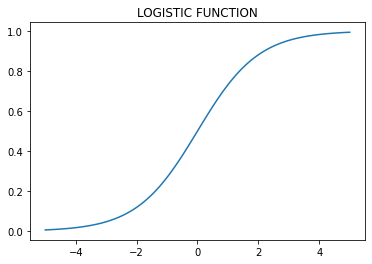

In [6]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.title('LOGISTIC FUNCTION')
plt.show()

# Implementing the Logistic Regression

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Initialization

In [9]:
data = pd.read_csv("/content/drive/MyDrive/Almabetter/Telco-Customer-Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [10]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [11]:
df = data.copy()

# Exploratory Data Analysis

For Independent Variable

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


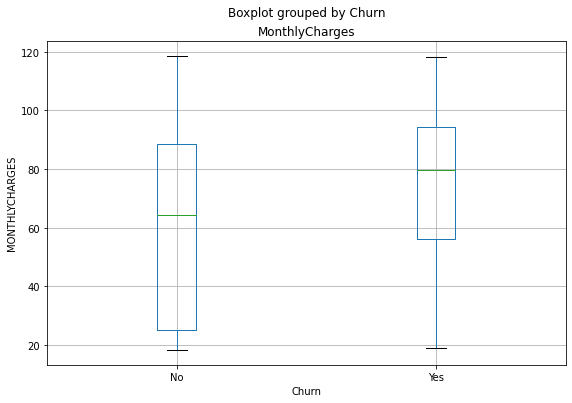

In [19]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MONTHLYCHARGES")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


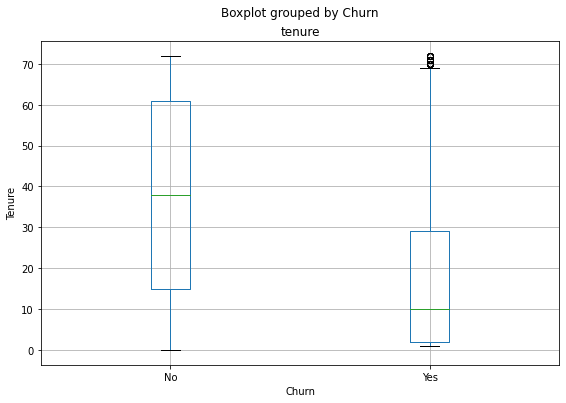

In [20]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

Insights from simple EDA

*   We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
*   There is also a slight difference between our target classes on monthly charges as shown in the first boxplot



An important step to do here is to convert Churn feature which is in string into integer.
We have to converted 1 to Yes and 0 in No.We will name the new columns as a 'class'

In [21]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)


In [22]:
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [23]:
df.shape

(7043, 22)

# Splitting the Data

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [25]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [26]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

# Fitting the logistic regression on train data

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [29]:
# get the model coefficient
clf.coef_

array([[-0.05646728,  0.03315385]])

In [31]:
clf.intercept_

array([-1.77408975])

# Evaluating the performance of the trained model

In [32]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [35]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [36]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [45]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [46]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [47]:
#get the predicted classes
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [48]:
train_preds

array([0, 0, 0, ..., 0, 1, 0])

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [52]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("Accuracy on train data is", train_accuracy)
print("Accuracy on test data is", test_accuracy)


Accuracy on train data is 0.7857649982250621
Accuracy on test data is 0.7735982966643009


# **Learnig about the confusion matrix**